In [1]:
import numpy as np
from scipy import integrate    
import matplotlib.pyplot as plt
import itertools
import arviz as az
import seaborn as sns
import pandas as pd
import pickle
sns.set_style("darkgrid")
pd.set_option('display.precision',1)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2g}'.format)

In [29]:
obs = pickle.load(open("results/lv/obs.p", "rb"))
t = obs["t"]
Z_obs = obs["Z_obs"]
Z_obs_noisy = obs["Z_obs_noisy"]

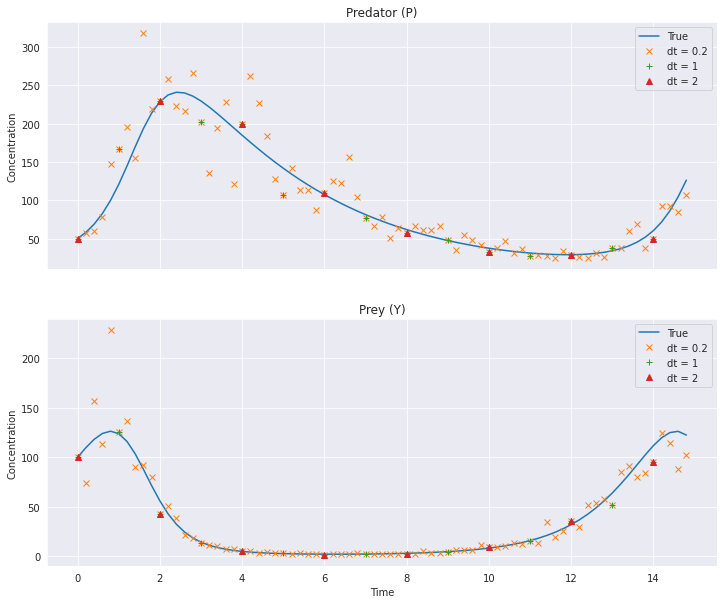

In [30]:
t_1, Z_obs_noisy_1 = t[::5], Z_obs_noisy[::5]
t_2, Z_obs_noisy_2 = t[::10], Z_obs_noisy[::10]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[1].plot(t, Z_obs[:,0], color = 'C0', label = 'True')
ax[0].plot(t, Z_obs[:,1], color = 'C0', label = 'True')
ax[1].plot(t, Z_obs_noisy[:,0], 'x', color = 'C1', label = 'dt = 0.2')
ax[0].plot(t, Z_obs_noisy[:,1], 'x', color = 'C1', label = 'dt = 0.2')
ax[1].plot(t_1, Z_obs_noisy_1[:,0], '+', color = 'C2', label = 'dt = 1')
ax[0].plot(t_1, Z_obs_noisy_1[:,1], '+', color = 'C2', label = 'dt = 1')
ax[1].plot(t_2, Z_obs_noisy_2[:,0], '^', color = 'C3', label = 'dt = 2')
ax[0].plot(t_2, Z_obs_noisy_2[:,1], '^', color = 'C3', label = 'dt = 2')
ax[1].legend()
ax[0].legend()

ax[1].set_title("Prey (Y)")
ax[0].set_title("Predator (P)")
ax[0].set_ylabel("Concentration")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Concentration")
fig.set_size_inches(12, 10)
plt.savefig("figures/lk_obs.png", dpi = 400)

In [31]:
reactive_sindy_rates = np.array([5.20865029e-01, 0.00000000e+00, 0.00000000e+00, 4.88080301e-03,
       0.00000000e+00, 3.00054367e-01, 9.75478103e-04, 0.00000000e+00,
       5.18979422e-02, 1.10304230e-02, 5.20865029e-01, 1.59239812e-03,
       3.07500620e-03, 1.59239812e-03, 2.08181763e-02, 1.09276150e-08])

In [4]:
fit_02 = pickle.load(open("results/lv/horseshoe_dx_0.2.p", "rb"))
fit_1 = pickle.load(open("results/lv/horseshoe_dx_1.0.p", "rb"))
fit_2 = pickle.load(open("results/lv/horseshoe_dx_2.0.p", "rb"))

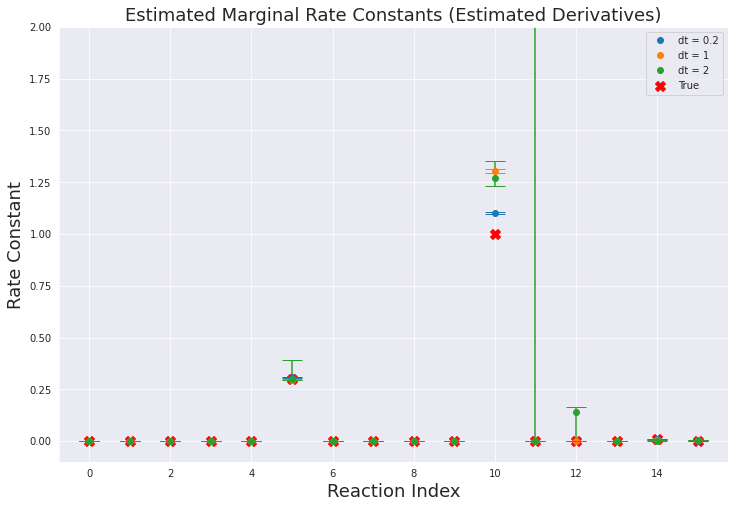

In [28]:
fig, ax = plt.subplots()
fits = [fit_02, fit_1, fit_2]
labels = ["dt = 0.2", "dt = 1", "dt = 2"]
for i, fit in enumerate(fits):
    rates = fit['fit'].stan_variables()['rates']
    pct_20 = np.percentile(rates, 20, axis = 0)
    pct_50 = np.percentile(rates, 50, axis = 0)
    pct_80 = np.percentile(rates, 80, axis = 0)
    
    ax.plot(np.arange(0,16,1), pct_50,'o', color = 'C%d' % i, label = labels[i])
    ax.errorbar(np.arange(0,16,1), pct_50, fmt = 'none', capsize = 10, color = 'C%d' % i, yerr = [pct_50 - pct_20, pct_80 - pct_50])

ax.set_ylim([-0.1, 2])
x_true = np.arange(0,16,1)
y_true = np.zeros(16)
y_true[10] = 1.0
y_true[5] = 0.3
y_true[14] = 0.01
ax.scatter(x_true, y_true, s = 100, marker = 'X', color = 'red', label = 'True')

ax.legend()
ax.set_title("Estimated Marginal Rate Constants (Estimated Derivatives)", fontsize = 18)
ax.set_xlabel("Reaction Index", fontsize = 18)
ax.set_ylabel("Rate Constant", fontsize = 18)
fig.set_size_inches(12, 8)
plt.savefig("figures/lv_estimated_parameters_horseshoe_dx.png", dpi = 400)

In [19]:
fit_02_ndx = pickle.load(open("results/lv/horseshoe_ndx_0.2.p", "rb"))
fit_1_ndx = pickle.load(open("results/lv/horseshoe_ndx_1.0.p", "rb"))
fit_2_ndx = pickle.load(open("results/lv/horseshoe_ndx_2.0.p", "rb"))

In [22]:
for i in range(4):
    print("%d : %f" % (i, np.mean(fit_02_ndx['fit'].sampler_variables()['lp__'][:,i])))

0 : -282.797213
1 : -282.964189
2 : -282.059379
3 : -282.850992


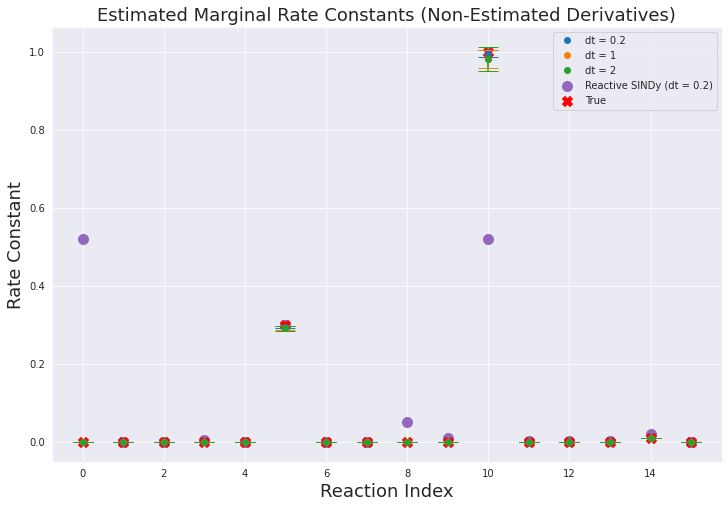

In [32]:
fig, ax = plt.subplots()
fits = [fit_02_ndx, fit_1_ndx,fit_2_ndx]
labels = ["dt = 0.2", "dt = 1", "dt = 2"]
for i, fit in enumerate(fits):
    rates = fit['fit'].stan_variables()['rates']
    pct_20 = np.percentile(rates, 20, axis = 0)
    pct_50 = np.percentile(rates, 50, axis = 0)
    pct_80 = np.percentile(rates, 80, axis = 0)
    
    ax.plot(np.arange(0,16,1), pct_50,'o', color = 'C%d' % i, label = labels[i])
    ax.errorbar(np.arange(0,16,1), pct_50, fmt = 'none', capsize = 10, color = 'C%d' % i, yerr = [pct_50 - pct_20, pct_80 - pct_50])

x_true = np.arange(0,16,1)
y_true = np.zeros(16)
y_true[10] = 1.0
y_true[5] = 0.3
y_true[14] = 0.01
ax.scatter(x_true, reactive_sindy_rates, s = 100, marker = 'o', color = 'C4', label = 'Reactive SINDy (dt = 0.2)')
ax.scatter(x_true, y_true, s = 100, marker = 'X', color = 'red', label = 'True')
ax.legend()
ax.set_title("Estimated Marginal Rate Constants (Non-Estimated Derivatives)", fontsize = 18)
ax.set_xlabel("Reaction Index", fontsize = 18)
ax.set_ylabel("Rate Constant", fontsize = 18)
fig.set_size_inches(12, 8)
plt.savefig("figures/lv_estimated_parameters_horseshoe_nondx.png", dpi = 400)

In [ ]:
fig, ax = plt.subplots(1, 2)

fit_02 = pickle.load(open("results/lv/horseshoe_dx_0.2.p", "rb"))
fit_1 = pickle.load(open("results/lv/horseshoe_dx_1.0.p", "rb"))
fit_2 = pickle.load(open("results/lv/horseshoe_dx_2.0.p", "rb"))
fits = [fit_02, fit_1, fit_2]
labels = ["dt = 0.2", "dt = 1", "dt = 2"]
for i, fit in enumerate(fits):
    rates = fit['fit'].stan_variables()['rates'][1000:,:]
    pct_20 = np.percentile(rates, 20, axis = 0)
    pct_50 = np.percentile(rates, 50, axis = 0)
    pct_80 = np.percentile(rates, 80, axis = 0)
    
    ax[0].plot(np.arange(0,16,1), pct_50,'o', color = 'C%d' % i, label = labels[i])
    ax[0].errorbar(np.arange(0,16,1), pct_50, fmt = 'none', capsize = 10, color = 'C%d' % i, yerr = [pct_50 - pct_20, pct_80 - pct_50])

x_true = np.arange(0,16,1)
y_true = np.zeros(16)
y_true[10] = 1.0
y_true[5] = 0.3
y_true[14] = 0.01
ax[0].scatter(x_true, y_true, s = 100, marker = 'X', color = 'red', label = 'True')

ax[0].legend()
ax[0].set_title("Estimated Marginal Rate Constants (Estimated Derivatives)")
ax[0].set_xlabel("Reaction Index")
ax[0].set_ylabel("Rate Constant")


fit_02_ndx = pickle.load(open("results/lv/horseshoe_0.2.p", "rb"))
fit_1_ndx = pickle.load(open("results/lv/horseshoe_1.p", "rb"))
fit_2_ndx = pickle.load(open("results/lv/horseshoe_2.p", "rb"))

fits = [fit_02_ndx, fit_1_ndx, fit_2_ndx]
labels = ["dt = 0.2", "dt = 1", "dt = 2"]
for i, fit in enumerate(fits):
    rates = fit['fit'].stan_variables()['rates'][1000:,:]
    pct_20 = np.percentile(rates, 20, axis = 0)
    pct_50 = np.percentile(rates, 50, axis = 0)
    pct_80 = np.percentile(rates, 80, axis = 0)
    
    ax[1].plot(np.arange(0,16,1), pct_50,'o', color = 'C%d' % i, label = labels[i])
    ax[1].errorbar(np.arange(0,16,1), pct_50, fmt = 'none', capsize = 10, color = 'C%d' % i, yerr = [pct_50 - pct_20, pct_80 - pct_50])

x_true = np.arange(0,16,1)
y_true = np.zeros(16)
y_true[10] = 1.0
y_true[5] = 0.3
y_true[14] = 0.01
ax[1].scatter(x_true, reactive_sindy_rates, s = 100, marker = 'o', color = 'C4', label = 'Reactive SINDy (dt = 0.2)')
ax[1].scatter(x_true, y_true, s = 100, marker = 'X', color = 'red', label = 'True')
ax[1].legend()
ax[1].set_title("Estimated Marginal Rate Constants (Non-Estimated Derivatives)")
ax[1].set_xlabel("Reaction Index")
ax[1].set_ylabel("Rate Constant")


fig.set_size_inches(20, 8)
plt.savefig("figures/lv_estimated_parameters_horseshoe.png", dpi = 400)

In [ ]:
fit.stan_variables()['rates']

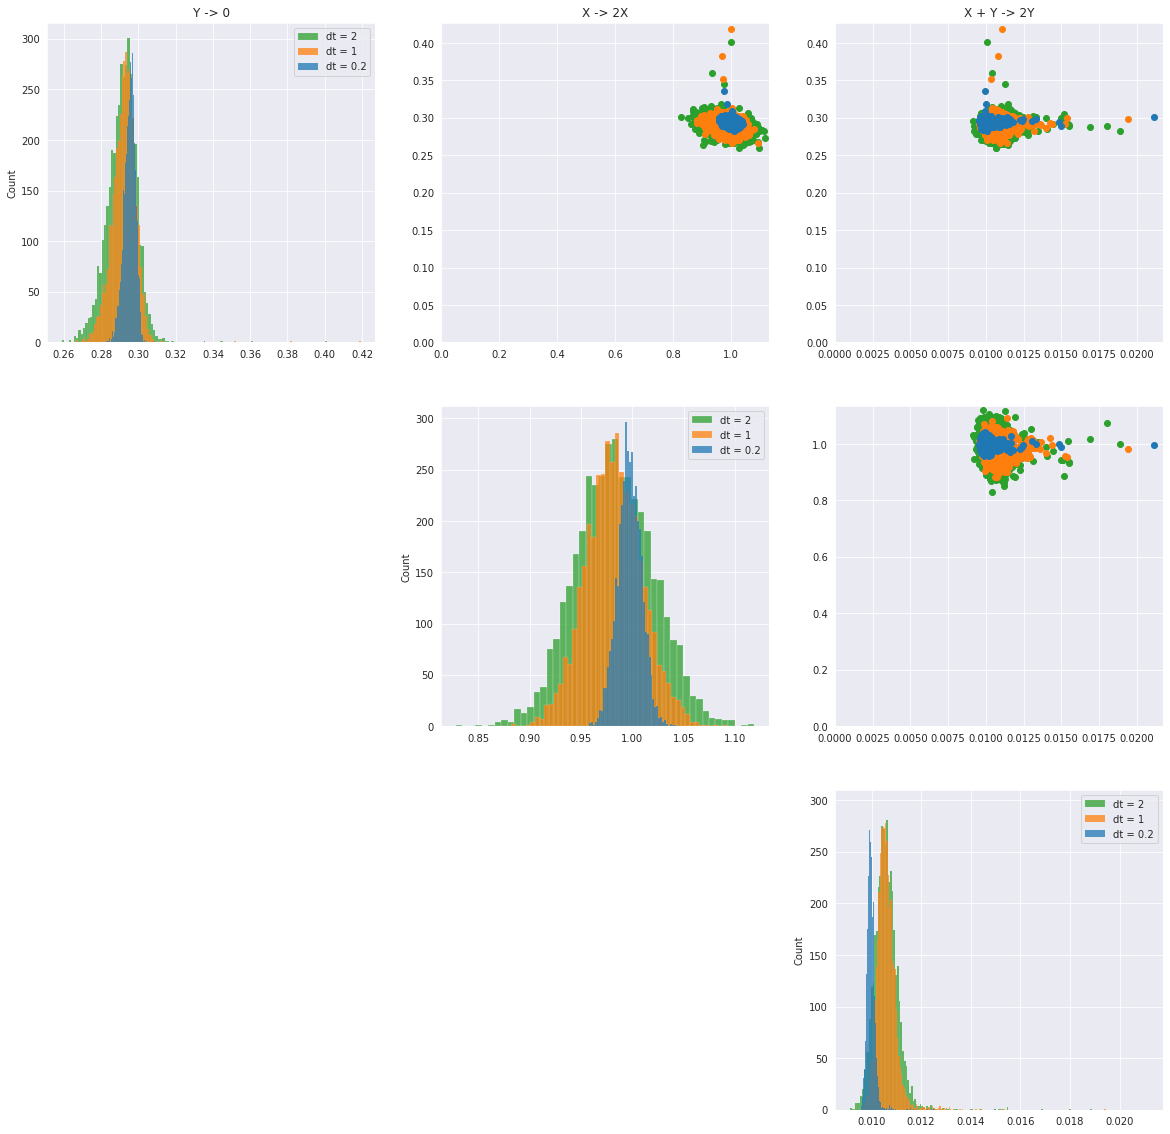

In [54]:
fig, ax = plt.subplots(3,3)
non_zeros = [5, 10, 14]
samples_2 = fit_2_ndx['fit'].stan_variables()['rates']
samples_1 = fit_1_ndx['fit'].stan_variables()['rates']
samples_02 = fit_02_ndx['fit'].stan_variables()['rates']
for i in range(3):
    ax[0,i].set_title(D[non_zeros[i]])
    for j in range(i, 3):
        if i == j:
            sns.histplot(samples_2[:,non_zeros[i]], bins = 'auto', color = 'C2', ax = ax[i][j], label = 'dt = 2');
            sns.histplot(samples_1[:,non_zeros[i]], bins = 'auto', color = 'C1', ax = ax[i][j], label = 'dt = 1');
            sns.histplot(samples_02[:,non_zeros[i]], bins = 'auto', color = 'C0', ax = ax[i][j], label = 'dt = 0.2');
            ax[i][j].legend()
        else:
            ax[i][j].scatter(samples_2[:,non_zeros[j]], samples_2[:,non_zeros[i]], color = 'C2')
            ax[i][j].scatter(samples_1[:,non_zeros[j]], samples_1[:,non_zeros[i]], color = 'C1')
            ax[i][j].scatter(samples_02[:,non_zeros[j]], samples_02[:,non_zeros[i]], color = 'C0')
            ax[i][j].set_xlim([0, None])
            ax[i][j].set_ylim([0, None])
            
            ax[j][i].axis('off')
            
fig.set_size_inches(20, 20)
plt.savefig("figures/lv_posterior_ndx.png", dpi = 400)

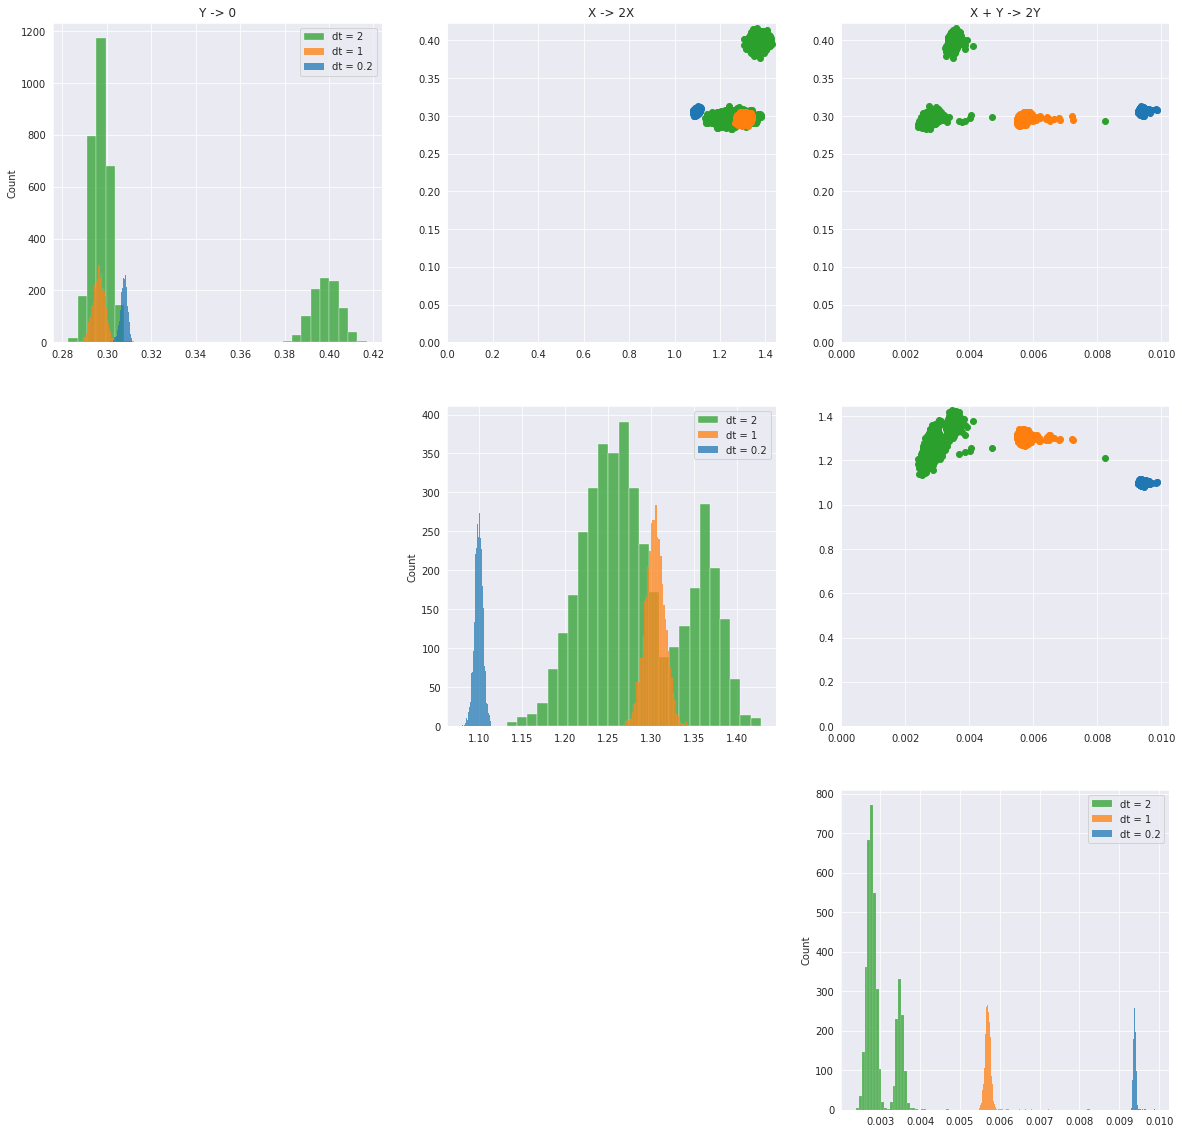

In [55]:
fig, ax = plt.subplots(3,3)
non_zeros = [5, 10, 14]
samples_2 = fit_2_dx['fit'].stan_variables()['rates']
samples_1 = fit_1_dx['fit'].stan_variables()['rates']
samples_02 = fit_02_dx['fit'].stan_variables()['rates']
for i in range(3):
    ax[0,i].set_title(D[non_zeros[i]])
    for j in range(i, 3):
        if i == j:
            sns.histplot(samples_2[:,non_zeros[i]], bins = 'auto', color = 'C2', ax = ax[i][j], label = 'dt = 2');
            sns.histplot(samples_1[:,non_zeros[i]], bins = 'auto', color = 'C1', ax = ax[i][j], label = 'dt = 1');
            sns.histplot(samples_02[:,non_zeros[i]], bins = 'auto', color = 'C0', ax = ax[i][j], label = 'dt = 0.2');
            ax[i][j].legend()
        else:
            ax[i][j].scatter(samples_2[:,non_zeros[j]], samples_2[:,non_zeros[i]], color = 'C2')
            ax[i][j].scatter(samples_1[:,non_zeros[j]], samples_1[:,non_zeros[i]], color = 'C1')
            ax[i][j].scatter(samples_02[:,non_zeros[j]], samples_02[:,non_zeros[i]], color = 'C0')
            ax[i][j].set_xlim([0, None])
            ax[i][j].set_ylim([0, None])
            
            ax[j][i].axis('off')
            
fig.set_size_inches(20, 20)
plt.savefig("figures/lv_posterior_dx.png", dpi = 400)

In [ ]:
fit_1_ndx = pickle.load(open("results/lv/horseshoe_1.p", "rb"))

In [ ]:
fit_1_ndx['fit'].stan_variables()['rates']

### Estimated Dynamics

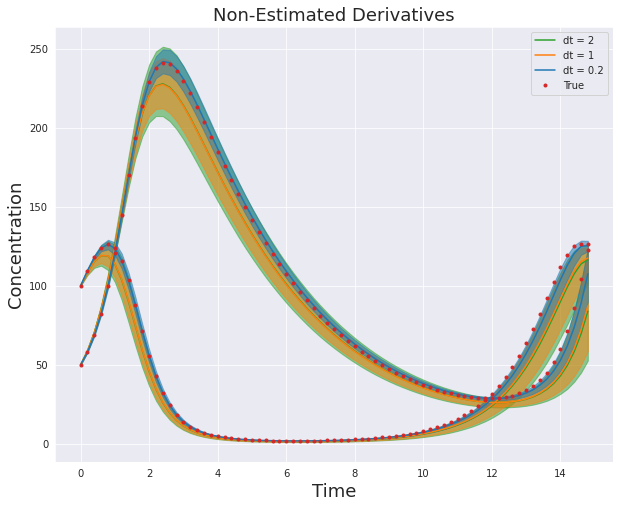

In [61]:
fig, ax = plt.subplots()
fit_02_dx = pickle.load(open("results/lv/horseshoe_ndx_0.2.p", "rb"))
fit_1_dx = pickle.load(open("results/lv/horseshoe_ndx_1.0.p", "rb"))
fit_2_dx = pickle.load(open("results/lv/horseshoe_ndx_2.0.p", "rb"))
labels = ["dt = 2", "dt = 1", "dt = 0.2"]
species_names = ['P', 'Y']
for j, fit_f in enumerate([fit_2_dx, fit_1_dx, fit_02_dx]):
    R = fit_f['R']
    D = fit_f['D']
    S = fit_f['S']
    fit = fit_f['fit']
    samples = fit.stan_variables()['rates']
    all_infs = []
    for i in range(samples.shape[0]):
        inferred_rates = samples[i,:]
        inferred_rates[inferred_rates < 1e-3] = 0
        def dZdt_inf(Z, t = 0):
            ap = np.hstack([Z, 1]) * (R == 1)
            ap += (np.hstack([Z, 1]) * (R == 2)) ** 2
            ap_mask = ap + (ap == 0).astype(np.float32)
            extend_Z = np.prod(ap_mask, axis = 1) * inferred_rates
            return (S.T @ extend_Z)[:-1]
        Z_obs_inf = integrate.odeint(dZdt_inf, [100, 50], t)
        all_infs.append(Z_obs_inf)
    
    all_infs = np.stack(all_infs)
    pct_20 = np.percentile(all_infs, 5, axis = 0)
    pct_50 = np.percentile(all_infs, 50, axis = 0)
    pct_80 = np.percentile(all_infs, 95, axis = 0)
    for k in range(2):
        if k == 1:
            ax.plot(t, pct_50[:,k], color = 'C%d' % (2 - j), alpha = 1, label = labels[j])
        else:
            ax.plot(t, pct_50[:,k], color = 'C%d' % (2 - j), alpha = 1)
        ax.fill_between(t, pct_20[:,k], pct_80[:,k], color = 'C%d' % (2 - j), alpha = 0.5)
        
ax.set_title("Non-Estimated Derivatives", fontsize = 18)
ax.set_xlabel("Time", fontsize = 18)
ax.set_ylabel("Concentration", fontsize = 18)
for k in range(2):
    if k == 1:
        ax.plot(t, Z_obs[:,k], '.', color = 'C3', label = 'True', alpha = 1)
    else:
        ax.plot(t, Z_obs[:,k], '.', color = 'C3', alpha = 1)
    ax.legend()
fig.set_size_inches(10, 8)
plt.savefig("figures/lv_trajectories_ndx.png", dpi = 400)

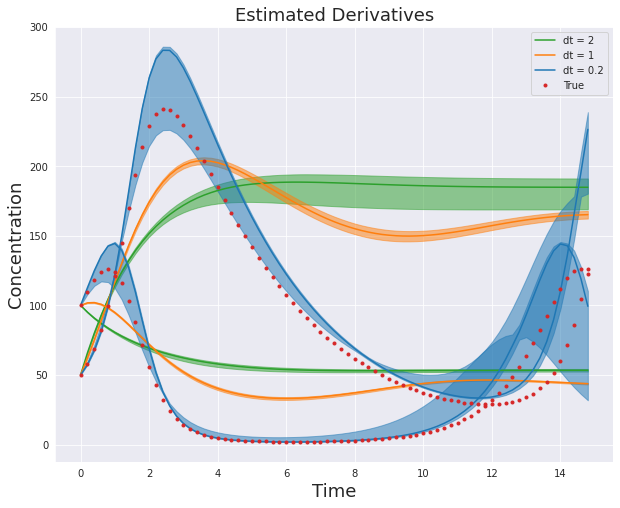

In [62]:
fig, ax = plt.subplots()
fit_02_dx = pickle.load(open("results/lv/horseshoe_dx_0.2.p", "rb"))
fit_1_dx = pickle.load(open("results/lv/horseshoe_dx_1.0.p", "rb"))
fit_2_dx = pickle.load(open("results/lv/horseshoe_dx_2.0.p", "rb"))
labels = ["dt = 2", "dt = 1", "dt = 0.2"]
species_names = ['P', 'Y']
for j, fit_f in enumerate([fit_2_dx, fit_1_dx, fit_02_dx]):
    R = fit_f['R']
    D = fit_f['D']
    S = fit_f['S']
    fit = fit_f['fit']
    samples = fit.stan_variables()['rates']
    all_infs = []
    for i in range(samples.shape[0]):
        inferred_rates = samples[i,:]
        inferred_rates[inferred_rates < 1e-3] = 0
        def dZdt_inf(Z, t = 0):
            ap = np.hstack([Z, 1]) * (R == 1)
            ap += (np.hstack([Z, 1]) * (R == 2)) ** 2
            ap_mask = ap + (ap == 0).astype(np.float32)
            extend_Z = np.prod(ap_mask, axis = 1) * inferred_rates
            return (S.T @ extend_Z)[:-1]
        Z_obs_inf = integrate.odeint(dZdt_inf, [100, 50], t)
        all_infs.append(Z_obs_inf)
    
    all_infs = np.stack(all_infs)
    pct_20 = np.percentile(all_infs, 5, axis = 0)
    pct_50 = np.percentile(all_infs, 50, axis = 0)
    pct_80 = np.percentile(all_infs, 95, axis = 0)
    for k in range(2):
        if k == 1:
            ax.plot(t, pct_50[:,k], color = 'C%d' % (2 - j), alpha = 1, label = labels[j])
        else:
            ax.plot(t, pct_50[:,k], color = 'C%d' % (2 - j), alpha = 1)
        ax.fill_between(t, pct_20[:,k], pct_80[:,k], color = 'C%d' % (2 - j), alpha = 0.5)

ax.set_title("Estimated Derivatives", fontsize = 18)    
ax.set_xlabel("Time", fontsize = 18)
ax.set_ylabel("Concentration", fontsize = 18)
for k in range(2):
    if k == 1:
        ax.plot(t, Z_obs[:,k], '.', color = 'C3', label = 'True', alpha = 1);
    else:
        ax.plot(t, Z_obs[:,k], '.', color = 'C3', alpha = 1);
    ax.legend()
    
fig.set_size_inches(10, 8)
plt.savefig("figures/lv_trajectories_dx.png", dpi = 400)